# Universidad San Francisco de Quito
## Final Proyect
### Developed by Bryan Torres

## Used libraries:

The following libraries are used:

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

## Original Dataset Analysis:

The imported dataset has a series of null values, in addition to a series of columns that will not be used for analysis:

In [2]:
# Importando dataset:
sr_results = pd.read_csv("survey_results_public.csv")
sr_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In this way, based on the previous information, the following information tables will be generated as pandas DataFrames:
- UserInfo - It will have relevant information for user analysis.

### Subdataset UserInfo


A new dataset will be generated based on the original dataset:

In [3]:
User_Info = sr_results[['ResponseId','EdLevel','MainBranch','DevType','Employment','Industry','OrgSize','RemoteWork','Age','YearsCodePro','YearsCode','WorkExp','Country','ConvertedCompYearly']].copy() 
User_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           89184 non-null  int64  
 1   EdLevel              87973 non-null  object 
 2   MainBranch           89184 non-null  object 
 3   DevType              76872 non-null  object 
 4   Employment           87898 non-null  object 
 5   Industry             36774 non-null  object 
 6   OrgSize              65043 non-null  object 
 7   RemoteWork           73810 non-null  object 
 8   Age                  89184 non-null  object 
 9   YearsCodePro         66136 non-null  object 
 10  YearsCode            87435 non-null  object 
 11  WorkExp              43579 non-null  float64
 12  Country              87973 non-null  object 
 13  ConvertedCompYearly  48019 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 9.5+ MB


#### Last Purge:

As part of the first purge, records that do not have information in the main analysis fields of the project will be deleted. This taking into account that the amount of information removed is 1.36%.

In [4]:
# Longitud original del subdataset UserInfo:
len_origin = len(User_Info)

#Borrado de rows con información faltante útil para el análisis:
User_Info.dropna(subset=['EdLevel', 'DevType', 'Employment','ConvertedCompYearly'], how='all', inplace=True)

# Longitud final del subdataset UserInfo:
len_fin = len(User_Info)

print(f'El porcentaje de información NaN eliminada es {round(((len_origin-len_fin)/len_origin)*100,2)} %')

El porcentaje de información NaN eliminada es 1.36 %


After the first purge the dataset looks like this:

In [5]:
User_Info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87973 entries, 1 to 89183
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           87973 non-null  int64  
 1   EdLevel              87973 non-null  object 
 2   MainBranch           87973 non-null  object 
 3   DevType              76872 non-null  object 
 4   Employment           87898 non-null  object 
 5   Industry             36774 non-null  object 
 6   OrgSize              65043 non-null  object 
 7   RemoteWork           73810 non-null  object 
 8   Age                  87973 non-null  object 
 9   YearsCodePro         66136 non-null  object 
 10  YearsCode            87435 non-null  object 
 11  WorkExp              43579 non-null  float64
 12  Country              87973 non-null  object 
 13  ConvertedCompYearly  48019 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 10.1+ MB


#### NULL Values Treatment:

The treatment of null values ​​is carried out, analyzing the records field by field:

##### DevType Field:


Null values ​​are corrected in the form:

In [6]:
# 1. Si el campo DevType es NaN y el empleo de la persona es "Student, full.time", entonces "DevType" es "Student":
User_Info.loc[(User_Info['DevType'].isnull() == True) & (User_Info['Employment'] == 'Student, full-time'), 'DevType'] = 'Student'

# 2. Si el campo DevType es NaN y el rama principal de la persona es "I am a developer by profession", entonces "DevType" es "Other Developer":
User_Info.loc[(User_Info['DevType'].isnull() == True) & (User_Info['MainBranch'] == 'I am a developer by profession'), 'DevType'] = 'Other Developer'

# 3. Para los restantes "DevType" reemplazar con "Other":
User_Info.loc[(User_Info['DevType'].isnull() == True), 'DevType'] = 'Other'

# 4. Si el DevType es "Other (please specify)" y el Main Brtanch es 'I am a developer by profession' reemplazar por Other Developer
User_Info.loc[(User_Info['DevType'] == 'Other (please specify):') & (User_Info['MainBranch'] == 'I am a developer by profession'), 'DevType'] = 'Other Developer'

# 5. Si el DevType es "Other (please specify)", para el restante de casos seleccionar "Other".
User_Info.loc[(User_Info['DevType'] == 'Other (please specify):'), 'DevType'] = 'Other'

##### Employment Field:
The Employment field is a composite field, which has several values ​​in the same record. In this way, null values ​​are corrected in the form:

In [7]:
# 1. Si el campo Employment es NaN, se reemplaza el valor "Unidentified"
User_Info.loc[(User_Info['Employment'].isnull() == True), 'Employment'] = 'Unidentified'

##### Industry field:

The industry field is referential, for how much null values ​​are replaced by "Other".

In [8]:
## 1. Reemplazar nulls: #Industry:
User_Info.loc[(User_Info['Industry'].isnull() == True),'Industry'] = 'Other'

##### OrgSize Field

The OrgSize field, being so personal and dependent on the user's information, how much the values ​​of the form are corrected:

In [9]:
# 1. Si la persona es estudiante full time y no tiene "OrgSize", se reemplaza por 'Just me - Student'
User_Info.loc[(User_Info['OrgSize'].isnull() == True) & (User_Info['Employment'] == 'Student, full-time'),'OrgSize'] = 'Just me - Student'

# 2. Para los demás casos se reemplaza por "Unidentified"
User_Info.loc[(User_Info['OrgSize'].isnull() == True),'OrgSize'] = 'Unidentified'


##### RemoteWork Field:

The NaN values ​​are replaced of the form

In [10]:
# 1. Si la persona es estudiante full time, se reemplaza por 'None - Student'.
User_Info.loc[(User_Info['RemoteWork'].isnull() == True) & (User_Info['Employment'] == 'Student, full-time'),'RemoteWork'] = 'None - Student'

# 2. Para los demás se reemplaza por "Unidentified"
User_Info.loc[(User_Info['RemoteWork'].isnull() == True),'RemoteWork'] = 'Unidentified'

##### YearsCodePro Field:
This field stores years of professional programming. In this way, the following validations and replacements were carried out:

In [11]:
# 1. Si la persona es desarrollador de algun tipo, y tiene años de experiencia, entonces YearsCodePro = WorkExp'
#Se separa el filtro pues es complejo de entender
filt_1 = (User_Info['YearsCodePro'].isnull() == True) & (User_Info['WorkExp'].isnull() == False) & (User_Info['DevType'].str.contains('Developer', case=False, na=False))
User_Info.loc[filt_1,'YearsCodePro'] = User_Info.loc[filt_1,'WorkExp']

# 2. Si la persona es estudiante full time, se reemplazan los años de programación profesional por 0'
User_Info.loc[(User_Info['YearsCodePro'].isnull() == True) & (User_Info['Employment'] == 'Student, full-time'),'YearsCodePro'] = 0

# 3. Si la persona no tiene años de programación profesional, es estudiante y su MainBranch es "I code primarily as a hobby", se reemplaza por 0.
User_Info.loc[(User_Info['YearsCodePro'].isnull() == True) & (User_Info['MainBranch'] == 'I code primarily as a hobby') & (User_Info['DevType'] == 'Student'),'YearsCodePro'] = 0

# 4. Si la persona no tiene años de programación profesional, es educador y su MainBranch es "I code primarily as a hobby", se reemplaza por 0.
User_Info.loc[(User_Info['YearsCodePro'].isnull() == True)  & (User_Info['MainBranch'] == 'I code primarily as a hobby') & (User_Info['DevType'] == 'Educator'),'YearsCodePro'] = 0

# 5. Si la persona no tiene años de programación profesional, la persona es algún tipo de desarrollador y tiene una edad de entre 18 a 24, se reemplaza por 0
User_Info.loc[(User_Info['YearsCodePro'].isnull() == True) & (User_Info['DevType'].str.contains('Developer', case=False, na=False)) & (User_Info['Age'] == '18-24 years old'),'YearsCodePro'] = 0

# 6. Si la persona no tiene años de programación profesional, la persona es algún tipo de desarrollador, tiene años generales de programación (quitando menos de 1 año y mas de 50).
#    La cantidad de años profesionales de desarrollo, se reemplaza por 1/4 parte del total de los años generales de desarrollo.
#Se separa el filtro pues es complejo de entender
filtro = (User_Info['YearsCodePro'].isnull() == True) & (User_Info['DevType'].str.contains('Developer', case=False, na=False)) & (User_Info['YearsCode'].isnull() == False) & ~(User_Info['YearsCode'].isin(['Less than 1 year','More than 50 years']))
User_Info.loc[filtro,'YearsCodePro'] = (User_Info.loc[filtro,'YearsCode'].astype(float) * (1/4)).astype(int).astype(str)

Additionally, we convert the values ​​to integers to facilitate analysis.

In [12]:
#Reemplazo el string menos de 1, por 1.
User_Info.loc[User_Info['YearsCodePro'] == 'Less than 1 year' ,'YearsCodePro'] = 1

#Reemplazo el string más de 50, por 50.
User_Info.loc[User_Info['YearsCodePro'] == 'More than 50 years','YearsCodePro'] = 50

#Convierto a entero, para facilitar el análisis y la comparación.
User_Info.loc[User_Info['YearsCodePro'].isnull() == False,'YearsCodePro'] = User_Info.loc[User_Info['YearsCodePro'].isnull() == False,'YearsCodePro'].astype('int64')

##### YearsCode Field:

This field stores the general years that the person has been programming. IN this way the following validations and replacements are carried out.

In [13]:
# 1. Si la persona no tiene años generales de programación, pero si años profesionales; se reemplazan los "YearsCode" por "YearsCode"
User_Info.loc[(User_Info['YearsCode'].isnull() == True) & (User_Info['YearsCodePro'].isnull() == False),'YearsCode'] = User_Info.loc[(User_Info['YearsCode'].isnull() == True) & (User_Info['YearsCodePro'].isnull() == False),'YearsCodePro']

Additionally, the "YearsCode" field is changed to an integer in order to simplify subsequent calculations.

In [14]:
#Reemplazo el string menos de 1, por 1.
User_Info.loc[User_Info['YearsCode'] == 'Less than 1 year','YearsCode'] = 1

#Reemplazo el string más de 50, por 50.
User_Info.loc[User_Info['YearsCode'] == 'More than 50 years','YearsCode'] = 50

#Convierto a entero, para facilitar el análisis y la comparación.
User_Info.loc[User_Info['YearsCode'].isnull() == False,'YearsCode'] = User_Info.loc[User_Info['YearsCode'].isnull() == False,'YearsCode'].astype(int)

##### WorkExp Field:
This field stores the years that the person has been working, in this way the following validations are carried out.

In [15]:
# 1. Comenzamos transformando los valores no nullos de la tabla a entero:
User_Info.loc[User_Info['WorkExp'].isnull() == False,'WorkExp'] = User_Info.loc[User_Info['WorkExp'].isnull() == False,'WorkExp'].astype(int)

#2. Si no tiene el dato de "WorkExp", pero tiene el dato de "YearsCodePro", se reemplaza "WorkExp" por "YearsCodePro"
User_Info.loc[(User_Info['WorkExp'].isnull() == True) & (User_Info['YearsCodePro'].isnull() == False),'WorkExp'] = User_Info.loc[(User_Info['WorkExp'].isnull() == True) & (User_Info['YearsCodePro'].isnull() == False),'YearsCodePro'].astype(int)

#3. Si se tiene el dato de "WorkExp", colocar "YearsCodePro" = 0, profesionales de otras ramas, programadores por Hobby.
User_Info.loc[(User_Info['WorkExp'].isnull() == False) & (User_Info['YearsCodePro'].isnull() == True),'YearsCodePro'] = 0

##### ConvertedCompYearly Field:

The field stores the person's annual salary, transformed into USD. Therefore, if we do not have the data, the data will be replaced by the average of the group of a series of fields. To do this, we define a function that will be used in the various transformations:

In [16]:
def replace_x_mean_grp(campos_tot_sin_mean, campos_grp, campo_mean, d_frame):
    # Verifica si los campos de agrupación y el campo de media están en el DataFrame
    missing_columns = [col for col in campos_grp + [campo_mean] if col not in d_frame.columns]
    if missing_columns:
        raise ValueError(f"Las siguientes columnas no están en el DataFrame: {missing_columns}")

    # Se crea un dataset con la media por los campos de agrupación
    campos_grp_t = campos_tot_sin_mean.copy()
    campos_grp_t.append(campo_mean)
    
    Us_inf_t = d_frame[campos_grp_t].dropna(subset=[campo_mean])

    # Agrupamos y calculamos la media del campo_mean
    Us_grp = Us_inf_t.groupby(campos_grp).agg({campo_mean: 'mean'}).reset_index()
    
    # Merge entre la info general y los promedios
    df_merged = pd.merge(d_frame, Us_grp, on=campos_grp, suffixes=('_OR', '_Gr'), how='left')

    # Sufijos para reemplazo
    suf_or = campo_mean + '_OR'
    suf_gr = campo_mean + '_Gr'
    campos_tot_sin_mean.append(suf_or)
    
    # Cuando no exista un valor, se reemplaza por el promedio
    df_merged[suf_or] = df_merged[suf_or].fillna(df_merged[suf_gr])

    # Se vuelve a crear el dataset original con los valores reemplazados
    d_frame = df_merged[campos_tot_sin_mean]
    d_frame = d_frame.rename(columns={suf_or: campo_mean})
    
    return d_frame

In [17]:
# Uso de la función

# 1. Reemplazar NaNs por el promedio de ['DevType', 'EdLevel', 'Country', 'YearsCodePro', 'WorkExp', 'Industry']:
User_Info = replace_x_mean_grp(
    ['ResponseId', 'EdLevel', 'MainBranch', 'DevType', 'Employment', 'Industry', 'OrgSize', 'RemoteWork', 'Age', 'YearsCodePro', 'YearsCode', 'WorkExp', 'Country'],
    ['DevType', 'EdLevel', 'Country', 'YearsCodePro', 'WorkExp', 'Industry'],
    'ConvertedCompYearly',
    User_Info
)

# 2. Reemplazar NaNs por el promedio de ['DevType', 'EdLevel', 'Country', 'YearsCodePro', 'WorkExp'], quitamos industria del group:
User_Info = replace_x_mean_grp(
    ['ResponseId', 'EdLevel', 'MainBranch', 'DevType', 'Employment', 'Industry', 'OrgSize', 'RemoteWork', 'Age', 'YearsCodePro', 'YearsCode', 'WorkExp', 'Country'],
    ['DevType', 'EdLevel', 'Country', 'YearsCodePro', 'WorkExp'],
    'ConvertedCompYearly',
    User_Info
)

# 3. Reemplazar NaNs por el promedio de ['DevType', 'EdLevel', 'Country', 'WorkExp'], quitamos industria y YearsCodePro del group:
User_Info = replace_x_mean_grp(
    ['ResponseId', 'EdLevel', 'MainBranch', 'DevType', 'Employment', 'Industry', 'OrgSize', 'RemoteWork', 'Age', 'YearsCodePro', 'YearsCode', 'WorkExp', 'Country'],
    ['DevType', 'EdLevel', 'Country', 'WorkExp'],
    'ConvertedCompYearly',
    User_Info
)


Additionally, if the person is a full-time student, the annual salary is replaced by 0.

In [18]:
User_Info.loc[(User_Info['ConvertedCompYearly'].isnull() == True) & (User_Info['Employment'] == 'Student, full-time'),'ConvertedCompYearly'] = 0

##### Other fields:

There are other fields that do not have NaN information or do not require processing:

- Response Id - Survey ID, corresponds to the person who filled out the survey.
- EdLevel - Maximum level of study.
- Main Branch - General description of whether or not the person is a developer or activity carried out.
- Age - Age range of the person.
- Country - Place of residence of the person who filled out the survey.

#### Last Purge

After the aforementioned debugging, the status of the dataset is observed:

In [19]:
User_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87973 entries, 0 to 87972
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           87973 non-null  int64  
 1   EdLevel              87973 non-null  object 
 2   MainBranch           87973 non-null  object 
 3   DevType              87973 non-null  object 
 4   Employment           87973 non-null  object 
 5   Industry             87973 non-null  object 
 6   OrgSize              87973 non-null  object 
 7   RemoteWork           87973 non-null  object 
 8   Age                  87973 non-null  object 
 9   YearsCodePro         81514 non-null  object 
 10  YearsCode            87655 non-null  object 
 11  WorkExp              81514 non-null  float64
 12  Country              87973 non-null  object 
 13  ConvertedCompYearly  68897 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB



Given that two of the fundamental fields for the analysis are still empty in certain cases and there is not a sufficiently refined criterion for their correction, it was decided to eliminate them from the final dataset.

In [20]:
print(f'La cantidad de información faltante a ser depurada es la siguiente: {round((len(User_Info[(User_Info['ConvertedCompYearly'].isnull()) | (User_Info['WorkExp'].isnull())])/len(User_Info))*100,2)} % del dataset filtrado')

La cantidad de información faltante a ser depurada es la siguiente: 21.74 % del dataset filtrado


In [21]:
#Borrado de rows con información faltante útil para el análisis:
User_Info.dropna(subset=['ConvertedCompYearly','WorkExp'], how='any', inplace=True)

In [22]:
User_Info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68847 entries, 0 to 87972
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           68847 non-null  int64  
 1   EdLevel              68847 non-null  object 
 2   MainBranch           68847 non-null  object 
 3   DevType              68847 non-null  object 
 4   Employment           68847 non-null  object 
 5   Industry             68847 non-null  object 
 6   OrgSize              68847 non-null  object 
 7   RemoteWork           68847 non-null  object 
 8   Age                  68847 non-null  object 
 9   YearsCodePro         68847 non-null  object 
 10  YearsCode            68840 non-null  object 
 11  WorkExp              68847 non-null  float64
 12  Country              68847 non-null  object 
 13  ConvertedCompYearly  68847 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 7.9+ MB


Seeing that we have no missing values, except in YearsCode, the final ones are replaced with 0. And the Response Id data 0 is also deleted, given that they are tests and there are 7 duplicate records.

In [23]:
## Borrar nulls en yearscode
User_Info.loc[User_Info['YearsCode'].isnull()] = 0

## Borrar response id 0
User_Info = User_Info[User_Info['ResponseId'] != 0]

In [24]:
User_Info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68840 entries, 0 to 87972
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           68840 non-null  int64  
 1   EdLevel              68840 non-null  object 
 2   MainBranch           68840 non-null  object 
 3   DevType              68840 non-null  object 
 4   Employment           68840 non-null  object 
 5   Industry             68840 non-null  object 
 6   OrgSize              68840 non-null  object 
 7   RemoteWork           68840 non-null  object 
 8   Age                  68840 non-null  object 
 9   YearsCodePro         68840 non-null  object 
 10  YearsCode            68840 non-null  object 
 11  WorkExp              68840 non-null  float64
 12  Country              68840 non-null  object 
 13  ConvertedCompYearly  68840 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 7.9+ MB


### Subdataset LearnMethods:


The LearnMethods Column has the means that developers or other professionals preferably use. Now, this column is joined by a delimiter ";". In this way we begin by generating a unique DataFrame.

In [25]:
#Se crea un dataset como copia del dataset de resultados original.
Learn_Methods = sr_results[['ResponseId','LearnCode']].copy()

#Se eliminan los valores NaN.
Learn_Methods.dropna(subset=['ResponseId','LearnCode'], how='any', inplace=True)

# Se filtran exclusivamente los ResponseId de los que tengo información concreta y limpia.
Learn_Methods = Learn_Methods[Learn_Methods['ResponseId'].isin(User_Info['ResponseId'])]

# Info del dataset
Learn_Methods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68676 entries, 1 to 89183
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ResponseId  68676 non-null  int64 
 1   LearnCode   68676 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB



Once the bounded dataset is obtained, the values ​​separated by ";" will be separated, to do this we will begin by developing a function:

In [26]:
# Función para separar rows con un delimitador.
def sep_df_x_delimiter(delimiter,col_con_del,df_con_del):
    
    df_con_del[col_con_del] = df_con_del[col_con_del].str.split(delimiter)
    df_con_del = df_con_del.explode(col_con_del).reset_index(drop=True)
    
    return df_con_del

In [27]:
#Dataframe segmentado correctamente.
Learn_Methods = sep_df_x_delimiter(';', 'LearnCode', Learn_Methods)

#Info del Dataset Final:
Learn_Methods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234384 entries, 0 to 234383
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ResponseId  234384 non-null  int64 
 1   LearnCode   234384 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


### Subdataset OS_Prof_Use

This dataset stores the Operating Systems used by developers or professionals who use StackOverflow. In this way, we begin by defining a new dataset.

In [28]:
#Se crea un dataset como copia del dataset de resultados original.
OS_Prof_Use = sr_results[['ResponseId','OpSysProfessional use']].copy()
OS_Prof_Use = OS_Prof_Use.rename(columns={'OpSysProfessional use': 'OSProfUse'})


#Se eliminan los valores NaN.
OS_Prof_Use.dropna(subset=['ResponseId','OSProfUse'], how='any', inplace=True)

# Se filtran exclusivamente los ResponseId de los que tengo información concreta y limpia.
OS_Prof_Use = OS_Prof_Use[OS_Prof_Use['ResponseId'].isin(User_Info['ResponseId'])]

# Info del dataset
OS_Prof_Use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62514 entries, 1 to 89183
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ResponseId  62514 non-null  int64 
 1   OSProfUse   62514 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


With the bounded dataset, the records are separated based on the delimiter ";"

In [29]:
#Dataframe segmentado correctamente.
OS_Prof_Use = sep_df_x_delimiter(';', 'OSProfUse', OS_Prof_Use)

#Info del Dataset Final:
OS_Prof_Use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119050 entries, 0 to 119049
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ResponseId  119050 non-null  int64 
 1   OSProfUse   119050 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


### Subdataset WebFrameWork:

This dataset stores the web development frameworks used by developers or professionals who use StackOverflow. In this way, we begin by defining a new dataset.

In [30]:
'WebframeHaveWorkedWith'

#Se crea un dataset como copia del dataset de resultados original.
Web_Frame_Work = sr_results[['ResponseId','WebframeHaveWorkedWith']].copy()
Web_Frame_Work = Web_Frame_Work.rename(columns={'WebframeHaveWorkedWith': 'WebFrameWork'})


#Se eliminan los valores NaN.
Web_Frame_Work.dropna(subset=['ResponseId','WebFrameWork'], how='any', inplace=True)

# Se filtran exclusivamente los ResponseId de los que tengo información concreta y limpia.
Web_Frame_Work = Web_Frame_Work[Web_Frame_Work['ResponseId'].isin(User_Info['ResponseId'])]

# Info del dataset
Web_Frame_Work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53790 entries, 1 to 89183
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ResponseId    53790 non-null  int64 
 1   WebFrameWork  53790 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


With the bounded dataset, the records are separated based on the delimiter ";"

In [31]:
#Dataframe segmentado correctamente.
Web_Frame_Work = sep_df_x_delimiter(';', 'WebFrameWork', Web_Frame_Work)

#Info del Dataset Final:
Web_Frame_Work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185849 entries, 0 to 185848
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ResponseId    185849 non-null  int64 
 1   WebFrameWork  185849 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


### Subdataset AIDevWork:

This dataset stores AI-powered development tools used by developers or professionals using StackOverflow. In this way, we begin by defining a new dataset.

In [32]:
#Se crea un dataset como copia del dataset de resultados original.
AI_Dev_Work = sr_results[['ResponseId','AIDevHaveWorkedWith']].copy()
AI_Dev_Work = AI_Dev_Work.rename(columns={'AIDevHaveWorkedWith': 'AIDevWork'})


#Se eliminan los valores NaN.
AI_Dev_Work.dropna(subset=['ResponseId','AIDevWork'], how='any', inplace=True)

# Se filtran exclusivamente los ResponseId de los que tengo información concreta y limpia.
AI_Dev_Work = AI_Dev_Work[AI_Dev_Work['ResponseId'].isin(User_Info['ResponseId'])]

# Info del dataset
AI_Dev_Work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20454 entries, 1 to 89183
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ResponseId  20454 non-null  int64 
 1   AIDevWork   20454 non-null  object
dtypes: int64(1), object(1)
memory usage: 479.4+ KB


With the bounded dataset, the records are separated based on the delimiter ";"

In [33]:
#Dataframe segmentado correctamente.
AI_Dev_Work = sep_df_x_delimiter(';', 'AIDevWork', AI_Dev_Work)

#Info del Dataset Final:
AI_Dev_Work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24557 entries, 0 to 24556
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ResponseId  24557 non-null  int64 
 1   AIDevWork   24557 non-null  object
dtypes: int64(1), object(1)
memory usage: 383.8+ KB


### Subdataset AISearchWork:
This dataset stores AI-powered search tools used by developers or professionals using StackOverflow. In this way, we begin by defining a new dataset.

In [34]:
#Se crea un dataset como copia del dataset de resultados original.
AI_Search_Work = sr_results[['ResponseId','AISearchHaveWorkedWith']].copy()
AI_Search_Work = AI_Search_Work.rename(columns={'AISearchHaveWorkedWith': 'AISearchWork'})


#Se eliminan los valores NaN.
AI_Search_Work.dropna(subset=['ResponseId','AISearchWork'], how='any', inplace=True)

# Se filtran exclusivamente los ResponseId de los que tengo información concreta y limpia.
AI_Search_Work = AI_Search_Work[AI_Search_Work['ResponseId'].isin(User_Info['ResponseId'])]

# Info del dataset
AI_Search_Work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43694 entries, 1 to 89183
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ResponseId    43694 non-null  int64 
 1   AISearchWork  43694 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


With the bounded dataset, the records are separated based on the delimiter ";"

In [35]:
#Dataframe segmentado correctamente.
AI_Search_Work = sep_df_x_delimiter(';', 'AISearchWork', AI_Search_Work)

#Info del Dataset Final:
AI_Search_Work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65244 entries, 0 to 65243
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ResponseId    65244 non-null  int64 
 1   AISearchWork  65244 non-null  object
dtypes: int64(1), object(1)
memory usage: 1019.6+ KB


### Subdataset LangWork:
This dataset stores the programming languages ​​used by developers or professionals who use StackOverflow. In this way, we begin by defining a new dataset.

In [36]:
#Se crea un dataset como copia del dataset de resultados original.
Lang_Work = sr_results[['ResponseId','LanguageHaveWorkedWith']].copy()
Lang_Work = Lang_Work.rename(columns={'LanguageHaveWorkedWith': 'LangWork'})


#Se eliminan los valores NaN.
Lang_Work.dropna(subset=['ResponseId','LangWork'], how='any', inplace=True)

# Se filtran exclusivamente los ResponseId de los que tengo información concreta y limpia.
Lang_Work = Lang_Work[Lang_Work['ResponseId'].isin(User_Info['ResponseId'])]

# Info del dataset
Lang_Work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68473 entries, 1 to 89183
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ResponseId  68473 non-null  int64 
 1   LangWork    68473 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


With the bounded dataset, the records are separated based on the delimiter ";"

In [37]:
#Dataframe segmentado correctamente.
Lang_Work = sep_df_x_delimiter(';', 'LangWork', Lang_Work)

#Info del Dataset Final:
Lang_Work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363520 entries, 0 to 363519
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ResponseId  363520 non-null  int64 
 1   LangWork    363520 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.5+ MB


### Subdataset BDDWork:

This dataset stores the databases used by developers or professionals who use StackOverflow. In this way, we begin by defining a new dataset.

In [38]:
#Se crea un dataset como copia del dataset de resultados original.
BDD_Work = sr_results[['ResponseId','DatabaseHaveWorkedWith']].copy()
BDD_Work = BDD_Work.rename(columns={'DatabaseHaveWorkedWith': 'BDDWork'})


#Se eliminan los valores NaN.
BDD_Work.dropna(subset=['ResponseId','BDDWork'], how='any', inplace=True)

# Se filtran exclusivamente los ResponseId de los que tengo información concreta y limpia.
BDD_Work = BDD_Work[BDD_Work['ResponseId'].isin(User_Info['ResponseId'])]

# Info del dataset
BDD_Work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58651 entries, 1 to 89183
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ResponseId  58651 non-null  int64 
 1   BDDWork     58651 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


With the bounded dataset, the records are separated based on the delimiter ";"

In [39]:
#Dataframe segmentado correctamente.
BDD_Work = sep_df_x_delimiter(';', 'BDDWork', BDD_Work)

#Info del Dataset Final:
BDD_Work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177544 entries, 0 to 177543
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ResponseId  177544 non-null  int64 
 1   BDDWork     177544 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


### Subdataset CloudPlWork:

This dataset stores the cloud tools developers or professionals that use StackOverflow. In this way, we begin by defining a new dataset.

In [40]:
#Se crea un dataset como copia del dataset de resultados original.
Cloud_Pl_Work = sr_results[['ResponseId','PlatformHaveWorkedWith']].copy()
Cloud_Pl_Work = Cloud_Pl_Work.rename(columns={'PlatformHaveWorkedWith': 'CloudPlWork'})


#Se eliminan los valores NaN.
Cloud_Pl_Work.dropna(subset=['ResponseId','CloudPlWork'], how='any', inplace=True)

# Se filtran exclusivamente los ResponseId de los que tengo información concreta y limpia.
Cloud_Pl_Work = Cloud_Pl_Work[Cloud_Pl_Work['ResponseId'].isin(User_Info['ResponseId'])]

# Info del dataset
Cloud_Pl_Work.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51510 entries, 1 to 89183
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ResponseId   51510 non-null  int64 
 1   CloudPlWork  51510 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


With the bounded dataset, the records are separated based on the delimiter ";"

In [41]:
#Dataframe segmentado correctamente.
Cloud_Pl_Work = sep_df_x_delimiter(';', 'CloudPlWork', Cloud_Pl_Work)

#Info del Dataset Final:
Cloud_Pl_Work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118037 entries, 0 to 118036
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ResponseId   118037 non-null  int64 
 1   CloudPlWork  118037 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [42]:
Cloud_Pl_Work

,ResponseId,CloudPlWork
0,2,Amazon Web Services (AWS)
1,2,Netlify
2,2,Vercel
3,3,Amazon Web Services (AWS)
4,3,Google Cloud
...,...,...
118032,89180,Firebase
118033,89180,Google Cloud
118034,89180,Heroku
118035,89180,Vercel


## SQLite Database:
The idea is to generate a scheme similar to a professional exploratory analysis. Therefore, an SQLite database is generated. SQLite will be used, since it is serverless.

In [43]:
#Crear SQLite databas:
def create_sqlite_database(filename):
    
    conn = None
    try:
        conn = sqlite3.connect(filename)
        print(sqlite3.sqlite_version)
    except sqlite3.Error as e:
        print(e)
    finally:
        if conn:
            conn.close()



create_sqlite_database("developers_data.db")

3.45.3



In this way, a function is created to insert tables into the database:

In [44]:
#función creación de tabla:
def create_table(bdd,sentence,tb_name):

    #conexion con base_datos:
    connection_obj = sqlite3.connect(bdd)
    
    #cursor:
    cursor_obj = connection_obj.cursor()
    
    cursor_obj.execute(sentence)
    
    print(f'Table {tb_name} is ready!')
    
    # Close the connection
    connection_obj.close()

#Funcion borrado si exsite.
def drop_if_exists(bdd,tb_name):

    #conexion con base_datos:
    connection_obj = sqlite3.connect(bdd)
    
    #cursor:
    cursor_obj = connection_obj.cursor()
    
    #borrar tabla si existe:
    cursor_obj.execute("DROP TABLE IF EXISTS " +tb_name)
    
    print(f'Table {tb_name} drop correctly!')
    
    # Close the connection
    connection_obj.close()


In [45]:

#Conexion:
bdd = 'developers_data.db'

print("-"*100)
#Primero se borran las tablas con foreign key en caso de errores
drop_if_exists(bdd,'Learn_Methods')
drop_if_exists(bdd,'OS_Prof_Use')
drop_if_exists(bdd,'Web_Frame_Work')
drop_if_exists(bdd,'AI_Dev_Work')
drop_if_exists(bdd,'AI_Search_Work')
drop_if_exists(bdd,'Lang_Work')
drop_if_exists(bdd,'BDD_Work')
drop_if_exists(bdd,'Cloud_Pl_Work')
drop_if_exists(bdd,'User_Info')
print("-"*100)

#Tabla 1 - Learn_Methods:
#--------------------------------------------
table = """ CREATE TABLE User_Info (
            ResponseId  INT PRIMARY KEY,
            EdLevel  VARCHAR(100) NOT NULL,
            MainBranch  VARCHAR(100),
            DevType VARCHAR(100),
            Employment VARCHAR(100),
            Industry VARCHAR(100),
            OrgSize VARCHAR(100),
            RemoteWork VARCHAR(100),
            Age VARCHAR(100),
            YearsCodePro INT,
            YearsCode INT,
            WorkExp INT,
            Country VARCHAR(100),
            ConvertedCompYearly VARCHAR(100)
        ); """

create_table(bdd,table,'User_Info')

#Tabla 2 - Learn_Methods:
#--------------------------------------------
table = """ CREATE TABLE Learn_Methods (
            ResponseId  INT NOT NULL,
            LearnCode   VARCHAR(100) NOT NULL,
            FOREIGN KEY (ResponseId) REFERENCES User_Info(ResponseId)
        ); """

create_table(bdd,table,'Learn_Methods')

#Tabla 3 - OS_Prof_Use:
#--------------------------------------------
table = """ CREATE TABLE OS_Prof_Use (
            ResponseId  INT NOT NULL,
            OSProfUse   VARCHAR(100) NOT NULL,
            FOREIGN KEY (ResponseId) REFERENCES User_Info(ResponseId)
        ); """

create_table(bdd,table,'OS_Prof_Use')


#Tabla 4 - Web_Frame_Work:
#--------------------------------------------
table = """ CREATE TABLE Web_Frame_Work (
            ResponseId  INT NOT NULL,
            WebFrameWork   VARCHAR(100) NOT NULL,
            FOREIGN KEY (ResponseId) REFERENCES User_Info(ResponseId)
        ); """

create_table(bdd,table,'Web_Frame_Work')


#Tabla 5 - AI_Dev_Work:
#--------------------------------------------
table = """ CREATE TABLE AI_Dev_Work (
            ResponseId  INT NOT NULL,
            AIDevWork   VARCHAR(100) NOT NULL,
            FOREIGN KEY (ResponseId) REFERENCES User_Info(ResponseId)
        ); """

create_table(bdd,table,'AI_Dev_Work')


#Tabla 6 - Web_Frame_Work:
#--------------------------------------------
table = """ CREATE TABLE AI_Search_Work (
            ResponseId  INT NOT NULL,
            AISearchWork   VARCHAR(100) NOT NULL,
            FOREIGN KEY (ResponseId) REFERENCES User_Info(ResponseId)
        ); """

create_table(bdd,table,'AI_Search_Work')


#Tabla 7 - Lang_Work:
#--------------------------------------------
table = """ CREATE TABLE Lang_Work (
            ResponseId  INT NOT NULL,
            LangWork   VARCHAR(100) NOT NULL,
            FOREIGN KEY (ResponseId) REFERENCES User_Info(ResponseId)
        ); """

create_table(bdd,table,'Lang_Work')


#Tabla 8 - BDD_Work:
#--------------------------------------------
table = """ CREATE TABLE BDD_Work (
            ResponseId  INT NOT NULL,
            BDDWork   VARCHAR(100) NOT NULL,
            FOREIGN KEY (ResponseId) REFERENCES User_Info(ResponseId)
        ); """

create_table(bdd,table,'BDD_Work')


#Tabla 9 - Cloud_Pl_Work:
#--------------------------------------------
table = """ CREATE TABLE Cloud_Pl_Work (
            ResponseId  INT NOT NULL,
            CloudPlWork   VARCHAR(100) NOT NULL,
            FOREIGN KEY (ResponseId) REFERENCES User_Info(ResponseId)
        ); """

create_table(bdd,table,'Cloud_Pl_Work')
print("-"*100)


----------------------------------------------------------------------------------------------------
Table Learn_Methods drop correctly!
Table OS_Prof_Use drop correctly!
Table Web_Frame_Work drop correctly!
Table AI_Dev_Work drop correctly!
Table AI_Search_Work drop correctly!
Table Lang_Work drop correctly!
Table BDD_Work drop correctly!
Table Cloud_Pl_Work drop correctly!
Table User_Info drop correctly!
----------------------------------------------------------------------------------------------------
Table User_Info is ready!
Table Learn_Methods is ready!
Table OS_Prof_Use is ready!
Table Web_Frame_Work is ready!
Table AI_Dev_Work is ready!
Table AI_Search_Work is ready!
Table Lang_Work is ready!
Table BDD_Work is ready!
Table Cloud_Pl_Work is ready!
----------------------------------------------------------------------------------------------------


In this way we will populate the data from the dataframes into the SQLite tables:

In [46]:
#FUNCION PARA POBLAR TABLAS:
def poblate_tabLes(bdd,d_frame,tb_name):

    conn = sqlite3.connect(bdd)
    d_frame.to_sql(tb_name, conn, if_exists='append', index=False)
    print(f'Table {tb_name} poblated!')
    conn.close()

In [47]:
#Conexion:
bdd = 'developers_data.db'


# Poblar tablas:
# ------------------------------------------------------
poblate_tabLes(bdd,User_Info,'User_Info') ## 1- User_Info - Primera por foreign keys.
poblate_tabLes(bdd,Learn_Methods,'Learn_Methods') ## 2- Learn_Methods
poblate_tabLes(bdd,OS_Prof_Use,'OS_Prof_Use') ## 3- OS_Prof_Use
poblate_tabLes(bdd,Web_Frame_Work,'Web_Frame_Work') ## 4- Web_Frame_Work
poblate_tabLes(bdd,AI_Dev_Work,'AI_Dev_Work') ## 5- AI_Dev_Work 
poblate_tabLes(bdd,AI_Search_Work,'AI_Search_Work') ## 6- AI_Search_Work 
poblate_tabLes(bdd,Lang_Work,'Lang_Work') ## 7- User_Info 
poblate_tabLes(bdd,BDD_Work,'BDD_Work') ## 8- User_Info 
poblate_tabLes(bdd,Cloud_Pl_Work,'Cloud_Pl_Work') ## 9- User_Info 

Table User_Info poblated!
Table Learn_Methods poblated!
Table OS_Prof_Use poblated!
Table Web_Frame_Work poblated!
Table AI_Dev_Work poblated!
Table AI_Search_Work poblated!
Table Lang_Work poblated!
Table BDD_Work poblated!
Table Cloud_Pl_Work poblated!


## Perform graph queries pointing to a database:

In any production application, it is most common to query a database, given that they are conflicted, isolated, and query permissions can be configured. Although in this case, they are relatively simple examples, the objective is to resemble a real productive environment.

In [48]:
def sql_to_df(bdd, query):
    # Conectar a la base de datos
    conn = sqlite3.connect(bdd)
    
    # Leer datos de la base de datos en un DataFrame de pandas
    df = pd.read_sql_query(query, conn)
    
    # Cerrar la conexión
    conn.close()
    
    return df

The objective of the function is to return the data to a Pandas DataFrame, so that it can be treated more easily with matplot or other graphing libraries.

In [49]:
sql_to_df('developers_data.db', "SELECT * FROM User_Info").head(3)

,ResponseId,EdLevel,MainBranch,DevType,Employment,Industry,OrgSize,RemoteWork,Age,YearsCodePro,YearsCode,WorkExp,Country,ConvertedCompYearly
0,2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,"Senior Executive (C-Suite, VP, etc.)","Employed, full-time","Information Services, IT, Software Development...",2 to 9 employees,Remote,25-34 years old,9,18,10,United States of America,285000.0
1,3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,"Developer, back-end","Employed, full-time","Information Services, IT, Software Development...","5,000 to 9,999 employees","Hybrid (some remote, some in-person)",45-54 years old,23,27,23,United States of America,250000.0
2,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,"Developer, front-end","Employed, full-time",Other,100 to 499 employees,"Hybrid (some remote, some in-person)",25-34 years old,7,12,7,United States of America,156000.0


### Does it make sense to return to Pandas again?:
In fact, it makes a lot of sense, a few reasons are explained:
- You cannot modify the data, dataframes are database queries, so they cannot be modified, which gives security to the environment.
- It is not necessary to have the dataframe as a global variable, since it exists in the context of the execution.
- An experience closer to a real productive environment will be achieved.

## Graphs for exploratory analysis:
Some graphs will be used for exploratory analysis:

C:\Users\bryan\AppData\Local\Temp\ipykernel_38644\2308254572.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AnnualSalary', y='DevType', data=df_dev, orient='h', palette='viridis', ax=ax)


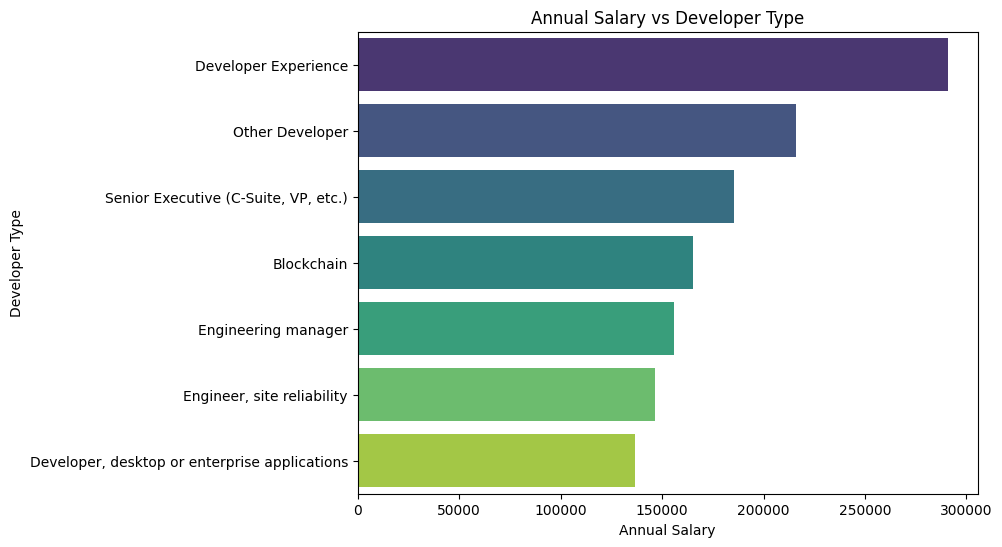

In [50]:
def graf_bar_1():

    #Exportar SQL y cambiar tipo de dato:
    df_dev = sql_to_df('developers_data.db', "SELECT DevType, AVG(ConvertedCompYearly) AS AnnualSalary FROM User_Info GROUP BY DevType ORDER BY 2 DESC LIMIT 7")
    df_dev['AnnualSalary'] = round(df_dev['AnnualSalary'].astype(float),2)

    #Imprimir Datos
    # Crear la figura y el objeto de ejes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Crear el gráfico de barras horizontal usando Seaborn y asignar el objeto de ejes
    sns.barplot(x='AnnualSalary', y='DevType', data=df_dev, orient='h', palette='viridis', ax=ax)

    # Configurar el título y etiquetas del gráfico
    ax.set_title('Annual Salary vs Developer Type')
    ax.set_xlabel('Annual Salary')
    ax.set_ylabel('Developer Type')

    # Mostrar el gráfico
    plt.show()

graf_bar_1()

C:\Users\bryan\AppData\Local\Temp\ipykernel_38644\1504877810.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AnualSalary', y='Country', data=df_dev, orient='h',palette='viridis')


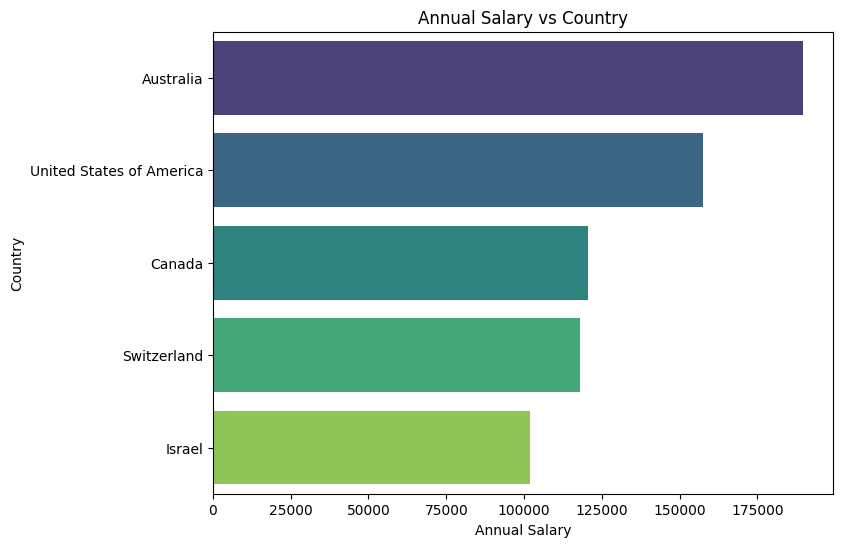

In [69]:
def graf_bar_2():
    df_dev = sql_to_df('developers_data.db', "SELECT Country, AnualSalary  FROM (SELECT Country, AVG(ConvertedCompYearly) AS AnualSalary , COUNT(1) AS Count FROM User_Info GROUP BY Country ORDER BY 3 DESC LIMIT 30) A ORDER BY AnualSalary DESC LIMIT 5")
    df_dev['AnualSalary'] = round(df_dev['AnualSalary'].astype(float),2)

    # Crear la figura y el objeto de ejes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Crear el gráfico de barras horizontal usando Seaborn y asignar el objeto de ejes
    sns.barplot(x='AnualSalary', y='Country', data=df_dev, orient='h',palette='viridis')

    # Configurar el título y etiquetas del gráfico
    ax.set_title('Annual Salary vs Country')
    ax.set_xlabel('Annual Salary')
    ax.set_ylabel('Country')

    # Mostrar el gráfico
    plt.show()

graf_bar_2()


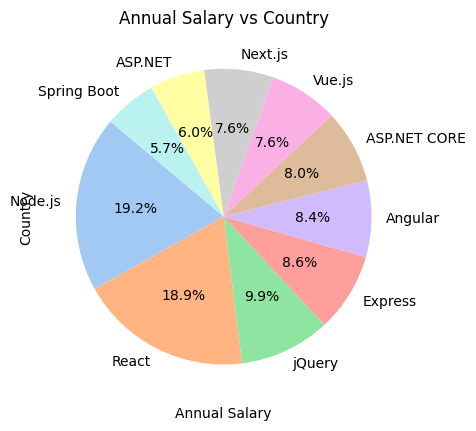

In [74]:
def pie_chart_3():

    df_dev = sql_to_df('developers_data.db', "SELECT WebFrameWork,Count(1) as Users FROM User_Info A INNER JOIN Web_Frame_Work B ON B.ResponseId = A.ResponseId GROUP BY WebFrameWork ORDER BY 2 DESC LIMIT 10")
    
    fig, ax = plt.subplots()
    
    ax.pie(df_dev['Users'], labels=df_dev['WebFrameWork'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

    # Configurar el título y etiquetas del gráfico
    ax.set_title('Annual Salary vs Country')
    ax.set_xlabel('Annual Salary')
    ax.set_ylabel('Country')

    # Mostrar el gráfico
    plt.show()

pie_chart_3()

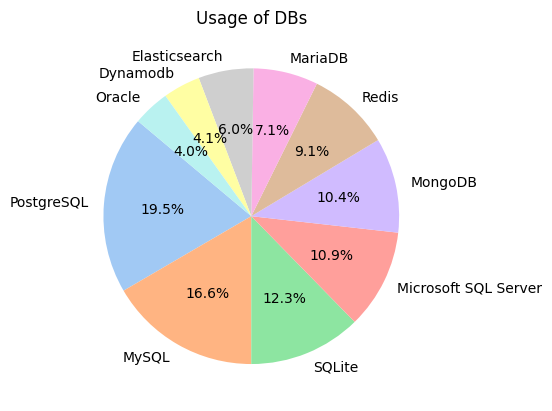

In [76]:
def pie_chart_4():
    df_dev = sql_to_df('developers_data.db', "SELECT BDDWork,Count(1) as Users FROM User_Info A INNER JOIN BDD_Work B ON B.ResponseId = A.ResponseId GROUP BY BDDWork ORDER BY 2 DESC LIMIT 10")
 
    fig, ax = plt.subplots()
    
    ax.pie(df_dev['Users'], labels=df_dev['BDDWork'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

    # Configurar el título y etiquetas del gráfico
    ax.set_title('Usage of DBs')

    # Mostrar el gráfico
    plt.show()

pie_chart_4()

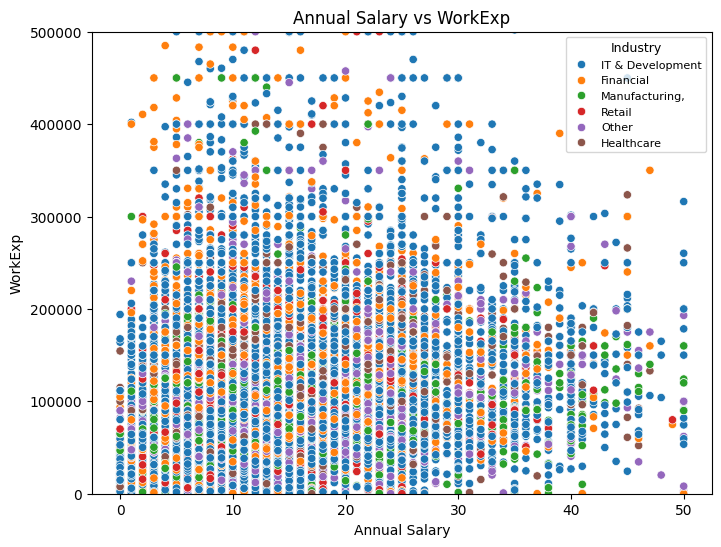

In [93]:
def disper_graf_5():
    
	query_disp = """
	SELECT 
	WorkExp
	,ConvertedCompYearly AS AnnualSalary
	,CASE WHEN A.Industry = 'Information Services, IT, Software Development, or other Technology' THEN 'IT & Development' 
		WHEN B.Industry IS NULL THEN 'Other'
		ELSE SUBSTR(A.Industry, 1, instr(A.Industry || ' ', ' ') - 1) END AS Industry
	FROM  User_Info A
	LEFT JOIN (SELECT Industry, COUNT(1) AS CONT FROM User_Info GROUP BY Industry ORDER BY 2 DESC LIMIT 6) B ON B.Industry = A.Industry
	WHERE DevType NOT IN ('Other', 'Other Developer') AND A.Industry NOT IN ('Other') 
	"""
	df_dev = sql_to_df('developers_data.db', query_disp)
	df_dev['AnnualSalary'] = round(df_dev['AnnualSalary'].astype(float),2)
	df_dev['WorkExp'] = df_dev['WorkExp'].astype(int)

	# Crear la figura y el objeto de ejes
	fig, ax = plt.subplots(figsize=(8, 6))

	sns.scatterplot(x='WorkExp', y='AnnualSalary', data=df_dev,hue='Industry')

	# Configurar el título y etiquetas del gráfico
	ax.set_title('Annual Salary vs WorkExp')
	ax.set_xlabel('Annual Salary')
	ax.set_ylabel('WorkExp')
	ax.legend(title='Industry', title_fontsize='9', fontsize='8', loc='best')
	plt.ylim(0, 500000)

	# Mostrar el gráfico
	plt.show()

disper_graf_5()


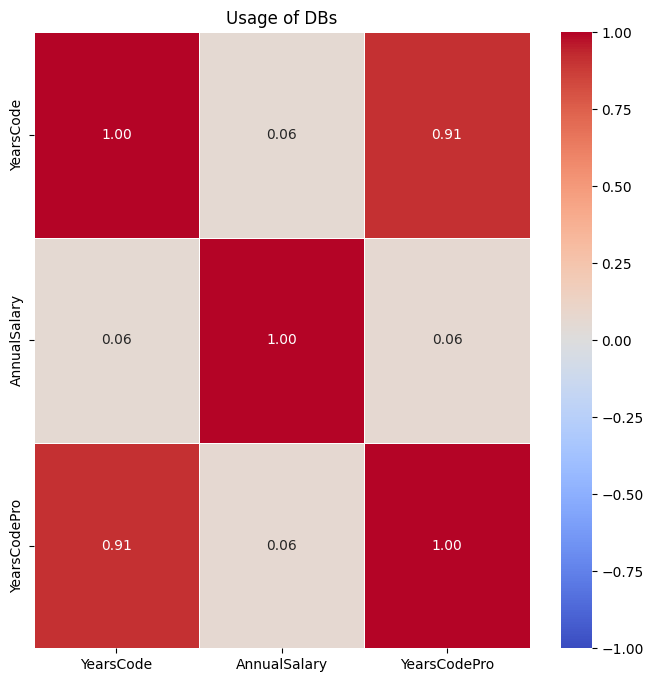

In [92]:
def corr_graf_6():

    df_dev = sql_to_df('developers_data.db', "SELECT  YearsCode, ConvertedCompYearly as AnnualSalary, YearsCodePro FROM User_Info")

    df_dev['AnnualSalary'] = round(df_dev['AnnualSalary'].astype(float),2)
    df_dev['YearsCode'] = df_dev['YearsCode'].astype(int)
    df_dev['YearsCodePro'] = df_dev['YearsCodePro'].astype(int)

    correlation_matrix = df_dev.corr()

    fig, ax = plt.subplots(figsize=(8, 8))  # Ajustar el tamaño de la figura

    sns.heatmap(correlation_matrix, 
                annot=True,                # Mostrar los valores en cada celda
                cmap='coolwarm',           # Paleta de colores
                fmt='.2f',                 # Formato de los valores
                linewidths=0.5,            # Ancho de las líneas que separan las celdas
                vmin=-1, vmax=1) 

    ax.set_title('Usage of DBs')

    plt.show()

corr_graf_6()